<h1>Fluorescence Anisotropy Analysis</h1>

Below is a step-by-step guide demonstrating the usage of all functinos on the example data set.

<h2>Importing the package</h2>

In [1]:
from flu_ani_analysis.flu_ani_analysis_module import FA as fa

<h2>Importing raw data</h2>

You can import the raw data in csv format that was exported from Perkin Elmer Envision instruments using the `read_in_envision` function. Reading in the data requires a plate map that contains information about every well.

Data in both plate and list format can be read in using the same function and the number of wells on the plate has to be specified.

In [2]:
data_file = 'example_data_set.csv'                # Note that this will only work if the files are in the same folder
platemap_file = 'example_data_set_platemap.csv'   # as this Jupyter notebook, alternatively you can provide a full file path

my_data = fa.read_in_envision(data_csv=data_file, platemap_csv=platemap_file, data_type='plate', size=384)

Data has been uploaded!

Value of g-factor: 1.0 
Number of repeats: 1 
Overall number of empty cells is 192 in 2 data frames.


<h2>Visualising the data for each well</h2>

The imported data is stored as pandas data frames in a nested dictionary. 
You can display the contents of each well (both the imported data and data from platemap) using the `visualise` function. 

The `labelby` argument specifes what is displayed on the well and `colorby` argument controls its color. All the platemap column names such as *Type*, *Contents*, *Protein Name*, *Protein Concentration*, *Tracer Name*, *Tracer Concentration* can be passed as `labelby` and `colorby` arguments. To display the imported data such as *p* and *s* channel intensity, pass a tuple of repeat number and the specified variable, e.g. `labelby=('repeat_1, 'p')`.

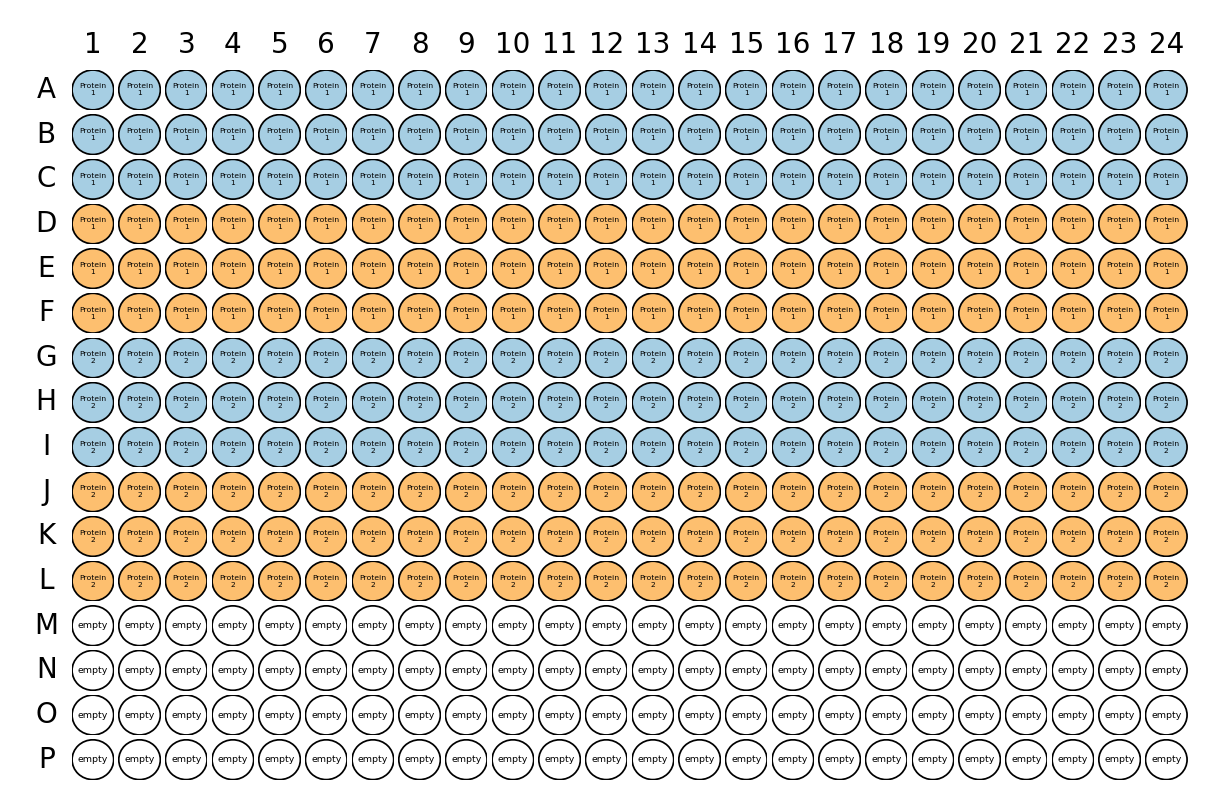

In [3]:
my_data.visualise(labelby='Protein Name', colorby='Type')

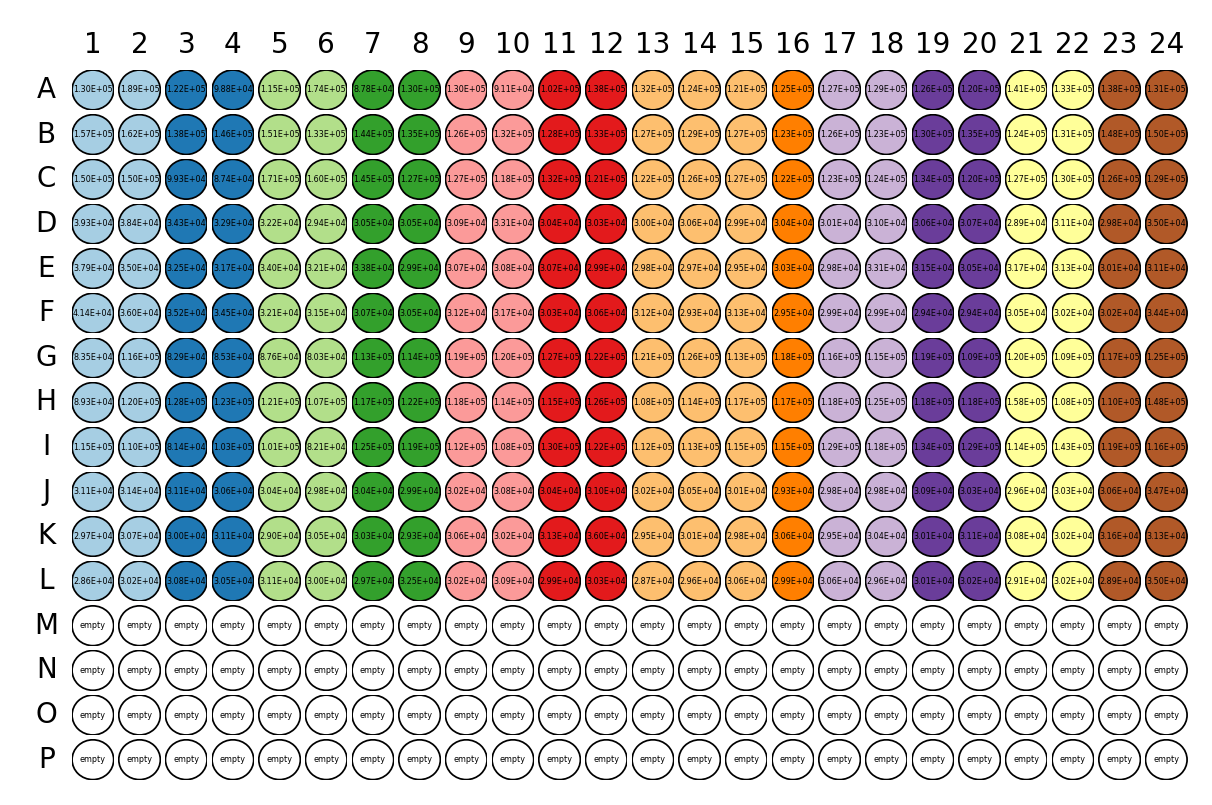

In [4]:
my_data.visualise(labelby=('repeat_1', 'p'), colorby='Protein Concentration')

<h2>Invalidation</h2>

You can invalidate individual `wells` and/or entire `rows` or `columns` by passing any of those three keyword arguments or their combination to the `invalidate` function. The invalidated wells will not be taken into consideration in subseqent calculations or displayed on the graphs. They can be made valid again by additionally passing the `valid=True` argument.

In [5]:
my_data.invalidate(wells=['A1', 'C3'])

The invalideted wells are marked with red stripes:

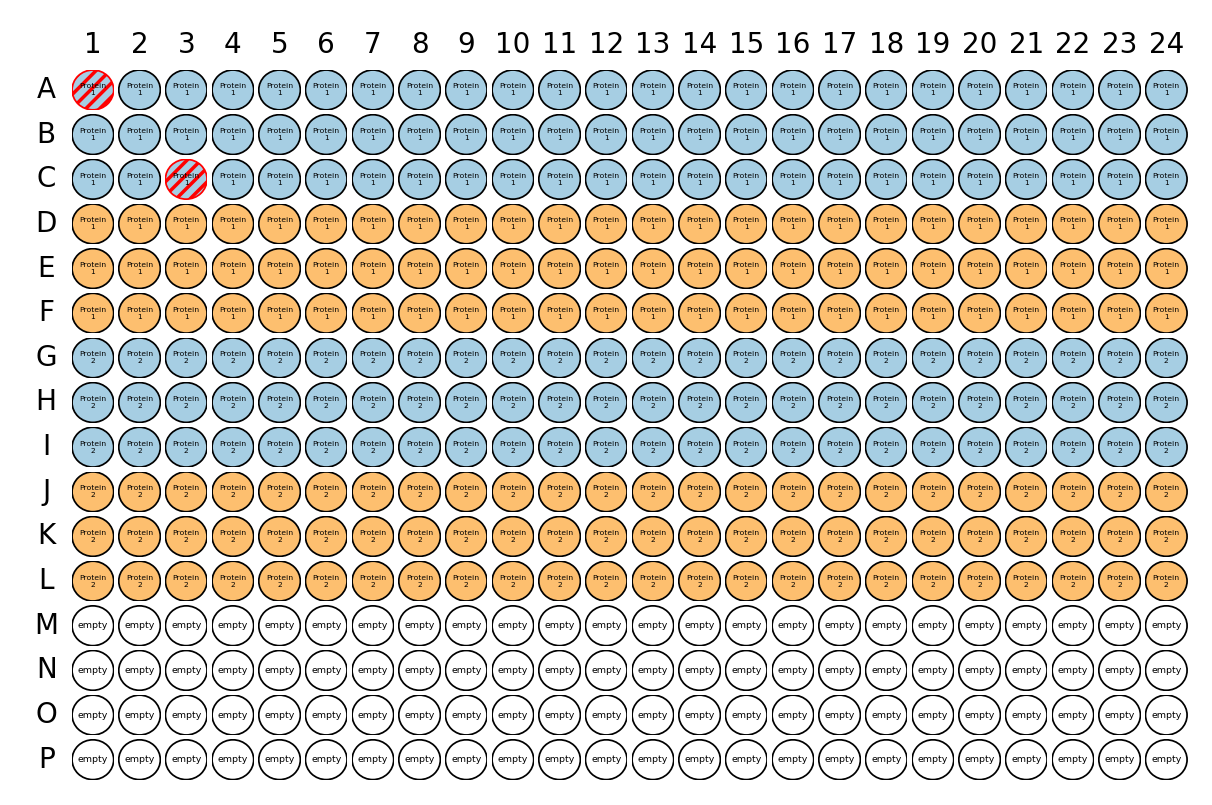

In [6]:
my_data.visualise(labelby='Protein Name', colorby='Type')

<h2>Background correction</h2>

To calculate the background corrected values for *p* and *s* channel intensity in all repeats use the `background_correct` function.

The backgorund correction is done by subtracting the mean value of blank *p* (or *s*) channel intensity for a given protein (or tracer) concentration from each value of the *p* or *s* channel intensity for that concentration. 

To display the background corrected values on the platemap use the *p_corrected* or *s_corrected* as a variable along the repeat number in the `visualise` function (e.g. `labelby=('repeat_2', 'p_corrected')`).

Background correction can be performed multiple times on a sigle data set, the existing corrected data will be overwritten.

In [7]:
my_data.background_correct()

Background correction has been successfully performed!


<h2>Anisotropy and intensity calculation</h2>

The `calculate_r_i` function calculates the anisotropy and intensity for each well in all repeats using the following formulas:

<p>$I = s + 2gp$</p>

<p>$r = \frac{s - gp}{I}$</p>

<p>Where <em>I</em> is fluorescence intensity, <em>r</em> is anisotropy, <em>g</em> is g factor, <em>p</em> is p channel intensity, <em>s</em> is s channel intensity.</p>
         
If the `correct=False` argument is passed the anisotropy an fluorescence inensity will only be calculated using the raw *p* and *s* channel values and not the background corrected values. The variables for the `visualise` funtion are: *i_raw*, *r_raw*, *i_corrected* and *r_corrected*.

The functinon also calculates the percentage intesity of the non blank well as comapred to the blank corrected wells. By default the plot of the percentage intenstiy against the well ids for all repeats is displayed along with a summary of wells above the threshold (defaults to 80%), however it can be turned off by passing the `plot_i=False` argument.

The fluorescence intensity and anisotropy have been successfully calculated!



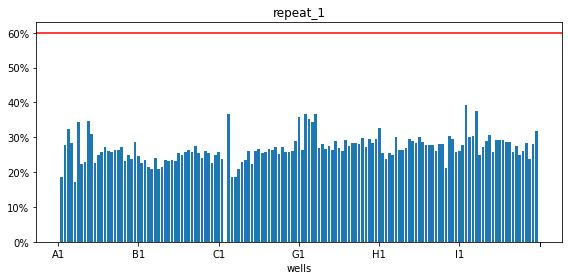

None of the wells has the percentage intensity value above the 60% threshold.


In [8]:
my_data.calculate_r_i(thr=60)

If you want to just display the percetnage intensity plots after the anisotropy and intensity caluclation use the `plot_i_percent` function.

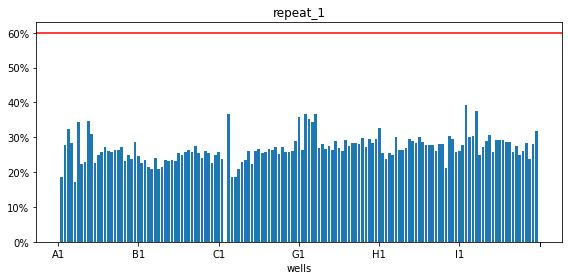

None of the wells has the percentage intensity value above the 60% threshold.


In [9]:
my_data.plot_i_percent()

<h2>Mean anisotropy and intensity calculation</h2>

To calculate the mean anisotropy and intensity along with their standard deviation and standrad error for all replicates for a given protein (or tracer) concentration use `calc_data_to_fit` function. This data is required for subsequent logistic curve fitting. 

In [10]:
my_data.calc_data_to_fit()

<h2>Logistic curve fitting</h2>

The `logistic_fit_all` functinon fits a logistic curve to the plot of anisotropy and intensity against protein (or tracer) concentration for each unique protein-tracer pair for all repeats. The fittting equation is: 

<p>$r = \frac{r_{min} - r_{max}}{1 + \bigl( \frac{p} {EC_{50}} \bigl) ^{hill}} + r_{max}$</p>

<p>Where <em>p</em> is protein concentration, <em>r<sub>max</sub></em> is the upper limit of anisotropy, <em>r<sub>min</sub></em> is the lower limit of anisotropy, <em>EC<sub>50</sub></em> is midpoint of transition, <em>hill</em> is the slope.</p>

The `curve_fit` function from SciPy module is used to do the curve fitting and so all arguments accepted by this function can be passed as keyword arguments to the `logistic_fit_all` function. The exception is `sigma` argument which is passed as either `sig='std'` or `sig='sem'` to perform the curve fitting taking into account the specified errors.

In [11]:
my_data.logistic_fit_all()

C:\Program Files (x86)\anaconda3\lib\site-packages\flu_ani_analysis\flu_ani_analysis_module.py:809: RuntimeWarning: The curve fitting failed in the following cases:

[('repeat_1', 'i', ('Protein 2', 'Tracer'), RuntimeError('Optimal parameters not found: Number of calls to function has reached maxfev = 1000.'))]

Use the 'logistic_fit_pair' function to adjust the initial guess for the parameters or pass other arguments to the fitting function.
  warnings.warn(f"The curve fitting failed in the following cases:\n\n{errors}\n\nUse the 'logistic_fit_pair' function to adjust the initial guess for the parameters or pass other arguments to the fitting function.", RuntimeWarning)


If the curve fitting fails for any of the protein-tracer pairs, a detailed warning is provided. In such cases you can use the `logistic_fit_pair` function to do the curve fitting for only one specific protein-tracer pair and variable and try passing additional arguments such as `sig`, `p0`, `bounds`, etc.

In [12]:
my_data.logistic_fit_pair(rep='repeat_1', var='I', pair=('Protein 2', 'Tracer'), sig='std', p0=[500000, 300000, 1300, 2])

You can display the plots of anisotropy and intensity against the protein (or tracer) concentration with a fitted logisitc curve for all repeats using the `plot_ani_all` function (the `err` argument specifes data used to display error bars, can be either `'std'` or `'sem'`).

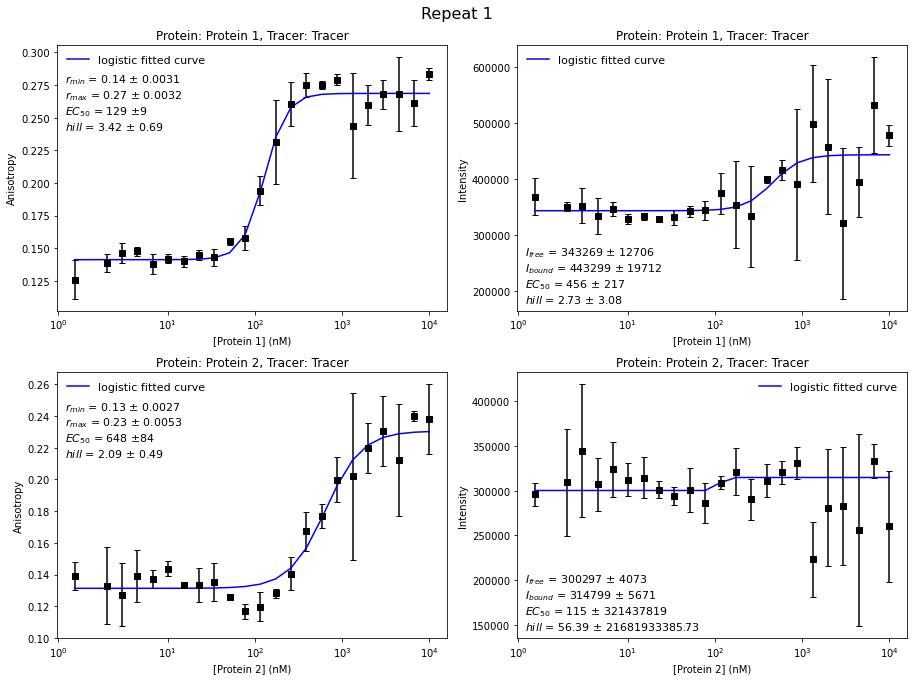

In [13]:
my_data.plot_ani_all()

If you want to display a plot for just one variable use the `plot_ani` function and specify the repeat number, variable and preotein-tracer pair. The figure can also be saved by passing either `export=True` to save in the same directory as this notebook or a string with a path to specified directory.  or in a different directory by passing a string with path to this directory.

To export all figures use the `export_ani_figs` function which by default the figure is saved in the same location as this Notebook. if you want to save them elssewhere, use the `path` argument to provide a path to specified directory as a string.

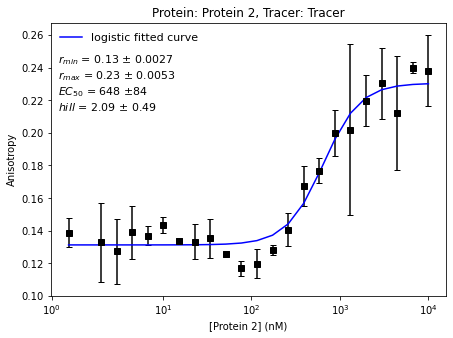

In [14]:
my_data.plot_ani(rep='repeat_1', var='r', pair=('Protein 2', 'Tracer'))

The fitting parameters (<em>r<sub>min</sub></em>, <em>r<sub>max</sub></em>, <em>EC<sub>50</sub></em>, etc.) are stored in the  `fit_params` data frame for each repeat.

In [15]:
my_data.data_dict['repeat_1']['data']['fit_params']

,,rmin,rmin error,rmax,rmax error,r_EC50,r_EC50 error,r_hill,r_hill error,Ifree,Ifree error,Ibound,Ibound error,I_EC50,I_EC50 error,I_hill,I_hill error,lambda
Protein 1,Tracer,0.141182,0.00308432,0.268484,0.00317768,128.524,8.79569,3.41695,0.694313,343269,12706.3,443299,19712.4,456.389,217.405,2.7312,3.0814,1
Protein 2,Tracer,0.131289,0.00274416,0.230477,0.00533703,648.136,83.9266,2.08634,0.488165,300297,4072.69,314799,5670.9,114.771,3.21438e+08,56.3926,2.16819e+10,1


<h2>Lambda calcualtion</h2>

To choose the lambda and/or rmin, rmax values that will be used in subsequent calculations for all protein tracer pairs use the `calc_lambda` function. This function caluclates the lambda value for each protein-tracer pair in all repeats so that you can choose it from multiple repeats and save it or leave the dafult value of 1. If you do not choose any of the calcualted lambda values you still have to choose the rmin and rmax values for each protein-tracer pair.

In [16]:
my_data.calc_lambda()

Choose the lambda values that will be saved for each protein-tracer pair. 
If you choose more than one lambda value for a given protein-tracer pair, only the first choice will be saved.
If you do not choose any lambda value for a given protein-trcacer pair, then you have select the rmin and rmax for this pair.


Button(description='Save', style=ButtonStyle())

Selected values were saved.


The selected values are stored in the `final_fit` data frame.

In [19]:
my_data.final_fit

,,rmin,rmin error,rmax,rmax error,lambda,Kd,Kd error
Protein 1,Tracer,0.141182,0.00308432,0.268484,0.00317768,1,NaN,NaN
Protein 2,Tracer,0.131289,0.00274416,0.230477,0.00533703,1,NaN,NaN


<h2>Amount of tracer bound calculation</h2>

The `calc_amountbound` function calculates the amount of fluorescent tracer bound to the protein using the following formula:

$L_{B} = \Bigl( \frac {\lambda(r_{max}-r)} {r-r_{min}} +1 \Bigl) ^{-1} L_{T}$

Where <em>L<sub>B</sub></em> is the concentration of fluorescent tracer bound to the target protein, <em>L<sub>T</sub></em> is the total tracer concentration, <em>&#955;</em> is the difference in quantum yields between bound and free states, <em>r</em> is the anisotropy, <em>r<sub>max</sub></em> is the upper limit of anisotropy, <em>r<sub>min</sub></em> is the lower limit of anisotropy. 

The mean value of anisotropy for all replicates (if present) for a given protein (or tacer) concentration is used in this calculation. The standard deviation and standard error are also calculated. 

In [20]:
my_data.calc_amountbound()

<h2>Sigle site curve fitting</h2>

The `singlesite_fit_all` function fits a curve to the plot of concentration of fluorescent tracer bound to the target protein  against the total protein concentration (or total tracer concentration in case of the tracer titration experiment). The following equation is used:

$L_{B} = \frac{ L_{T}+P_{T}+K_{d} - \sqrt{ (L_{T}+P_{T}+K_{d})^2 - 4L_{T}+P_{T} }}{2}$

Where <em>L<sub>T</sub></em> is the total tracer concentration, <em>P<sub>T</sub></em> is the total protein concentration, <em>K<sub>d</sub></em> is the dissociation constant.


In [21]:
my_data.singlesite_fit_all()

C:\Program Files (x86)\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


If the curve fitting fails for any of the protein-tracer pairs, a detailed warning is provided. In such cases you can use the `siglesite_fit_pair` function to do the curve fitting for only one specific protein-tracer pair and try passing additional arguments such as `sig`, `p0`, `bounds`, etc.


The resulting fitting parameters <em>L<sub>T</sub></em> (or <em>P<sub>T</sub></em>) and <em>K<sub>d</sub></em> and their associated errors are added to the `final_fit` data frame. 

In [22]:
my_data.final_fit

,,rmin,rmin error,rmax,rmax error,lambda,Kd,Kd error,LT,LT error
Protein 1,Tracer,0.141182,0.00308432,0.268484,0.00317768,1,16.7358,10.5857,203.702456,7.691327
Protein 2,Tracer,0.131289,0.00274416,0.230477,0.00533703,1,920.034,257.705,242.455122,19.906863


You can display the plots of concentration of fluorescent tracer bound to target protein against the protein (or tracer) concentration with a fitted curve using the `plot_kd` function (the `err` argument specifes data used to display error bars, can be either `'std'` or `'sem'`). By default, the function plots data for all repeats and protein-tracer pairs on separate figures, however you can use the `rep`, `prot` and `trac` arguments to pass a list of repeats or proteins names or tracers names for which the plots will be generated. 

To plot data for the Protein and tracer only in repeat 1:

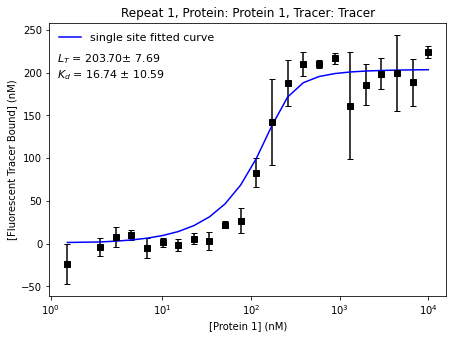

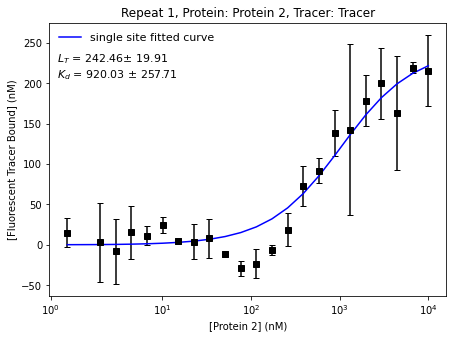

In [23]:
my_data.plot_kd(rep=[1], prot=['all'], trac=['all'])

To overlay data for specified proteins and tracers on a single graph pass the additional argument `overlay=True`.

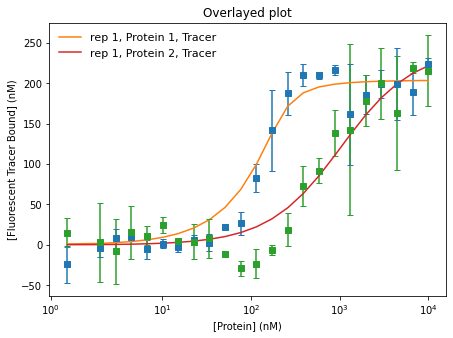

In [24]:
my_data.plot_kd(rep=[1], prot=['all'], trac=['all'], overlay=True)

To export the graphs either pass the `export=True` to save them in the same location as this notebook or pass a string with path to preferred directory (e.g. `export="C:\\folder1\\folder2\\"` for Windows OS)

<h2>Importing the fitting parameters</h2>

You can import the fitting parameters to the `final_fit` data frame from a csv file using the `import_params` function. 

<h2>Exporting the fitting parameters</h2>

The `export_params` function exports the `final_fit`data frame and the `fit_params` data from each repeat as csv (`file_type='csv'`) or Excel (`file_type='excel'`) files.

<h2>Setting the fitting parameters</h2>

You can manually set change the fitting parameters for any protein-tracer pair using the `set_fitparams` functions. By default the function changes the parameters in the `final_fit` data frame, however you can also change the `'fit_params` data frame with fitting parameters for each repeat by passing `final=False` and the repeat number (e.g. `rep='repeat_1'`). The parameters to be changed are accepted as keyword arguments (e.g. `rmax=0.4`, etc.)